In [1]:
# Modules used for data handling and manipulation
import numpy as np
import pandas as pd

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Module used for pearson correlation
from scipy.stats.stats import pearsonr   

# Modules used for preprocessing
from datetime import datetime
import preprocess

# Module for suppressing warnings.
import warnings 
warnings.filterwarnings('ignore')

/var/folders/5g/gx13kvt96znbgdtb0fm1r14c0000gn/T/ipykernel_18155/2307407920.py:10: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
df_ = preprocess.preprocess("electricity")

In [3]:
df_.head()

,timestamp,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA 1: Proportion of zeros

In [4]:
df = df_.set_index('timestamp')
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
zero_prop = np.array([(df[col] == 0).sum() for col in df.columns])/df.shape[0]
clients = np.arange(1, 371)

Text(0, 0.5, 'Proportion of zero readings')

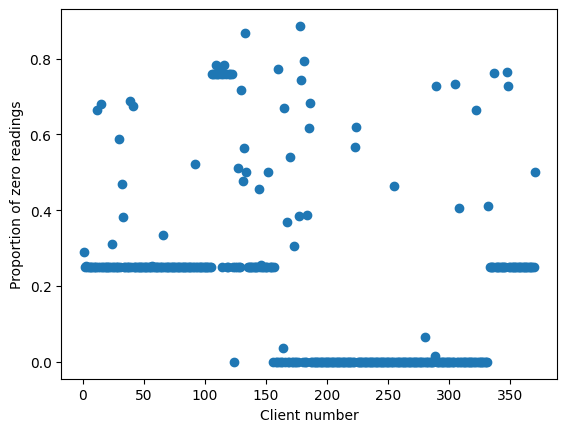

In [6]:
plt.figure(1)
plt.scatter(clients, zero_prop)
plt.xlabel('Client number')
plt.ylabel('Proportion of zero readings')

In [7]:
(zero_prop > 0.4).sum()

np.int64(49)

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
s = df.MT_001
s.index[s != 0][0]

Timestamp('2012-01-01 00:15:00')

In [10]:
start_date = np.array([df[col].index[df[col] != 0][0] for col in df.columns])

Text(0, 0.5, 'Start date')

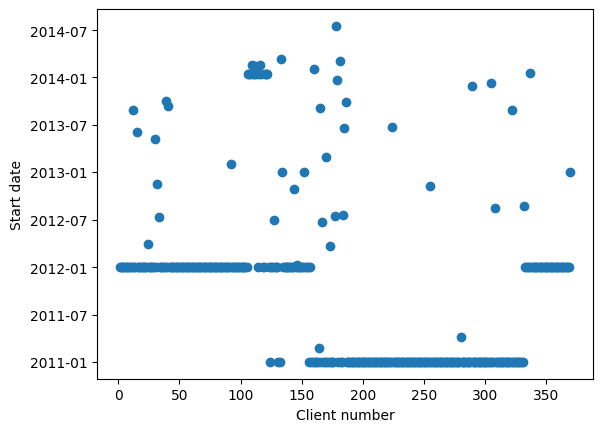

In [11]:
plt.figure(2)
plt.scatter(clients, start_date)
plt.xlabel('Client number')
plt.ylabel('Start date')

# EDA 2: Newly added customers and correlation with weather

In [12]:
df = df_.copy()

In [13]:
cols = [i for i in df.columns if i != "timestamp"]
x = (df[cols] != float(0)).idxmax()
y = pd.DataFrame(df.loc[x, "timestamp"].value_counts()).reset_index()
y["year"] = pd.to_datetime(y.timestamp).dt.year

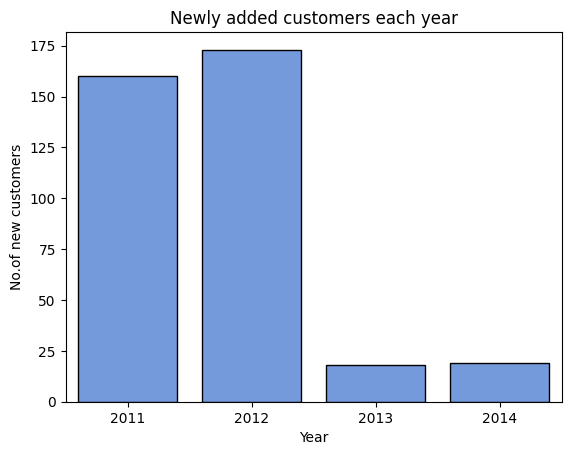

In [14]:
new_yearly_cust = y.groupby("year", as_index=False)["count"].sum()
sns.barplot(data = new_yearly_cust,
            x = "year",
            y = "count",
            color = "cornflowerblue",
            edgecolor = "black")
plt.title("Newly added customers each year")
plt.ylabel("No.of new customers")
plt.xlabel("Year")
plt.show()

In [15]:
temp = preprocess.preprocess("temperature")
precip = preprocess.preprocess("precipitation")

In [16]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = pd.to_datetime(df["timestamp"].dt.strftime("%m-%d-%Y"))
d = df.groupby(["date"]).sum("MT_001").sort_index()

In [17]:
d = d.reset_index(drop = True)

In [18]:
def qualitative_corr(cor):

    sign = None
    if cor < 0:
       sign = "negative"
    else:
       sign = "positive"

    cor = abs(cor)
    
    if 0 <= cor <= 0.19:
        return "very weak", sign
    elif 0.2 <= cor <= 0.39:
        return "weak", sign
    elif 0.4 <= cor <= 0.59:
        return "moderate", sign
    elif 0.6 <= cor <= 0.79:
        return "strong", sign
    return "very strong", sign

agg = {"feature": [], "magnitude": [], "sign": []}
yrs = [2011, 2012, 2013, 2014]

for i in d.columns:
    start_service_idx = (d[i] != 0).idxmax()
    elec_consump = d[i].values[start_service_idx:1461]
    max_temp = temp["tmax"].reset_index(drop = True).values[start_service_idx:]
    min_temp = temp["tmin"].reset_index(drop = True).values[start_service_idx:]
    preci = precip["precip"].reset_index(drop = True).values[start_service_idx:]

    
    _ = qualitative_corr(pearsonr(elec_consump, max_temp).statistic)
    agg["feature"].append("tmax")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])
    
    _= qualitative_corr(pearsonr(elec_consump, min_temp).statistic)
    agg["feature"].append("tmin")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])
    
    _ = qualitative_corr(pearsonr(elec_consump, preci).statistic)
    agg["feature"].append("precip")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])

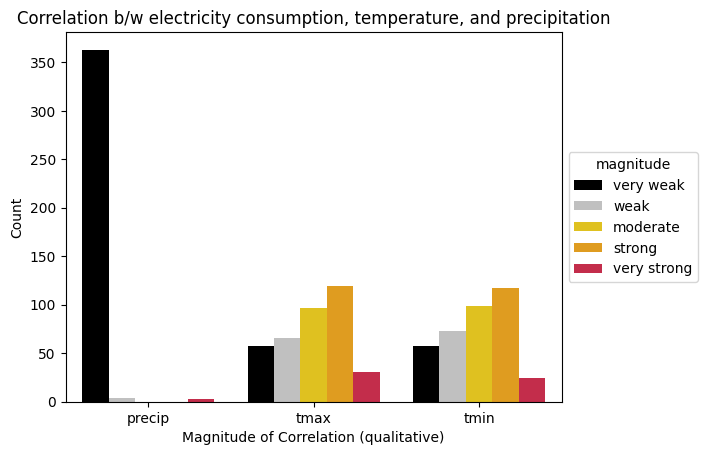

In [19]:
corr = pd.DataFrame.from_dict(agg)
corr_agg = corr[["feature", "magnitude"]].value_counts().reset_index()
ordinal_order = ["very weak", "weak", "moderate", "strong", "very strong"]
colors = ["crimson", "orange", "gold", "silver", "black"]

palette = dict(zip(ordinal_order, colors[::-1]))

sns.barplot(data = corr_agg, x = "feature", y = "count", 
            hue = "magnitude", palette = palette, 
            hue_order = ordinal_order)
plt.xlabel("Magnitude of Correlation (qualitative)")
plt.ylabel("Count")
plt.title("Correlation b/w electricity consumption, temperature, and precipitation")
plt.legend(title = "magnitude",
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

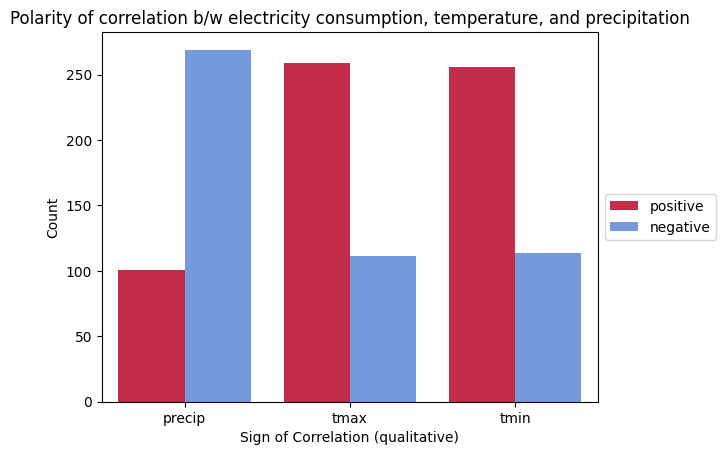

In [20]:
corr = pd.DataFrame.from_dict(agg)
corr_agg = corr[["feature", "sign"]].value_counts().reset_index()
ordinal_order = ["positive", "negative"]
colors = ["crimson", "cornflowerblue"]

palette = dict(zip(ordinal_order, colors))

sns.barplot(data = corr_agg, x = "feature", y = "count", 
            hue = "sign", palette = palette, 
            hue_order = ordinal_order)
plt.xlabel("Sign of Correlation (qualitative)")
plt.ylabel("Count")
plt.title("Polarity of correlation b/w electricity consumption, temperature, and precipitation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()